<h3>Yosef Peyser</h3>  

In [1]:
import numpy as np
import sys

<b>OHLCV - minutely

In [53]:
#data = [open, high, low, close, volume USD], most recent entries first
data_newest = np.loadtxt(open("data/Bitstamp_Minutely.csv", "rb"), delimiter=",", skiprows=2, usecols=(3,4,5,6,8))

#oldest entries first data
data_oldest = data_newest[::-1]

<b>Compute Exponential Moving Averages for each entry with 2 different periods</b>

Exponential moving average (EMA) = (Value_current * 2/(1+Observations)) + EMA_previous * (1 - (2/1+observations))  
Simple moving average (SMA) for n days = sum(last n values)/n  

Variables: short: time period for shorter term EMA, long: time period for longer term EMA, column: which feature to use.

** I want to be able to calculate (in a loop) short and long EMAs from the same time index (ex: i=50, i want to calculate the 50th entrie's long and short EMA in the loop at the same time). Then, the first EMA is calculated starting at index=long. If we start from t=0, calculating short/long EMA isnt possible since you need previous entries. Calculating the short EMA for entires [0:short] will be possible, but calculating the long EMA for entries [0:short] isnt possible since you need len(long) number of entries. 

In [77]:
X = data_oldest #convenient naming
short = 9     #shorter time period
long = 26     #longer time period
column = 0    #Which feature? open-0, close-1, high-2, low-3, volume-4.
EMA = np.zeros((data_oldest.shape[0],2))     #EMA, matrix of [short period EMA, long period EMA]

#** REFER TO ABOVE MARKDOWN CELL
EMA[long-1][0] = np.sum(X[long-short:long,column])/short   #These are SMAs used for the intial EMA calculation
EMA[long-1][1] = np.sum(X[0:long,column])/long             #These are SMAs used for the intial EMA calculation

#calculate EMA:
w0 = 2/(1+short)   #short period weights
w1 = 2/(1+long)    #long period weights
for i in range(long, data_oldest.shape[0]):
    EMA[i][0] = X[i][column]*w0 + EMA[i-1][0]*(1-w0)    #short term EMA 
    EMA[i][1] = X[i][column]*w1 + EMA[i-1][1]*(1-w1)    #long term EMA 

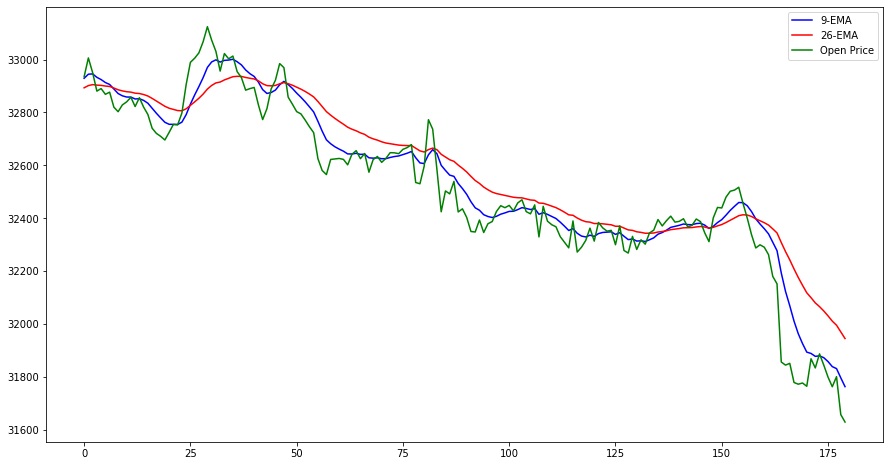

In [106]:
#plot 9-EMA,26-EMA,open vs time  #
import matplotlib.pyplot as plt
time = 50000
plt.figure(figsize = (15,8))
plt.plot(EMA[time:time+180,0], color='blue')
plt.plot(EMA[time:time+180,1], color='red')
plt.plot(X[time:time+180,0], color='green')
plt.legend(["9-EMA","26-EMA","Open Price"])
plt.show()

<h4>NOTES</h4>
EXPONENTIAL MOVING AVERAGE https://www.investopedia.com/terms/e/ema.asp  

average price calculation over a specific time period that puts more weight on the most recent price data, causing it to react faster to price change. helps determine trend, direction, and strength. 
1. Simple moving average (SMA) 20 days = sum(last 20 closing prices)/20.
2. Current EMA = (Value Currently * 2/(1+Observations)) + Yesterday's EMA * (1 - (2/1+observations)).  

eg: prices for t1, ..., t20. the first EMA calculated will use the SMA, but use EMAs from then on.
_Calculate SMA for t1 to t20.
_EMA at t21 = ( price at t21 * 2/(1+20) ) + SMA * (1-2/(1+20))
_EMA at t22 = ( price at t22 * 2/(1+20) ) + EMA_21 * (1-2/(1+20))
then, calculate two EMA's for different periods of time. Find optimal periods that reflect cross-over trends well. Start with 9, 26 min windows where value is price. Also try 12, 26.  
"Similarly, the EMA relies wholly on historical data. Many economists believe that markets are efficient, which means that current market prices already reflect all available information. If markets are indeed efficient, using historical data should tell us nothing about the future direction of asset prices." -Investopedia